In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import skimage.io
import skimage.morphology
import skimage.segmentation

import warnings

import os.path

import joblib

In [9]:
data_set_dir = "/home/jr0th/github/segmentation/data/set02/"

# masks are 0 for background, 1 for cell and 255 for boundary
# are copied manually, see step 3

# images are in uint (16 bits), need to be casted to ubyte (8 bits).
images = skimage.io.imread_collection(data_set_dir + "raw_images/*")

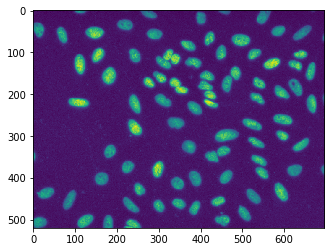

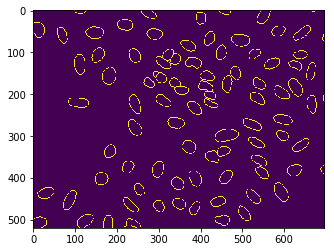

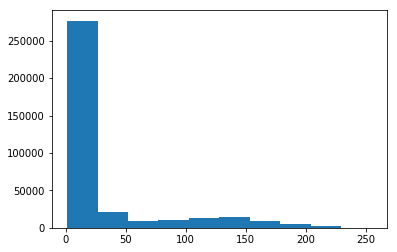

(array([  0,   1, 255], dtype=uint8), array([296892,  50379,  14649]))
(520, 696)
(520, 696)


In [10]:
# DEBUG
plt.imshow(images[0])
plt.show()
plt.imshow(labels[0])
plt.show()

plt.hist(images[0].flatten())
plt.show()

print(np.unique(labels[0].flatten(), return_counts=True))

print(images[0].shape)
print(labels[0].shape)

In [11]:
def process_image(index):
    image = images[index]
    name = labels.files[index]
    filename = os.path.basename(name)
    
    # convert in ubyte (8 bit)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        image_8bit = skimage.img_as_ubyte(image)

    # save
    skimage.io.imsave(data_set_dir + 'all_images/' + filename, image_8bit)

for i in range(len(labels)):
    process_image(i)

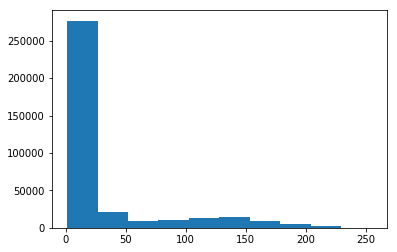

In [12]:
debug_image_8bit = skimage.io.imread_collection(data_set_dir + "all_images/*")[0]
plt.hist(debug_image_8bit.flatten(), bins=10)
plt.show()